<a href="https://colab.research.google.com/github/kishanuR/INSE-Project/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [4]:
df = pd.read_csv('/content/Pregnant.csv')
df.head(25)

,Age (yrs),Weight (Kg),Height(Cm),BMI,Pregnant(Y/N)
0,28,44.6,152.0,19.3,0
1,36,65.0,161.5,24.9,1
2,33,68.8,165.0,25.3,1
3,37,65.0,148.0,29.7,0
4,25,52.0,161.0,20.1,1
5,36,74.1,165.0,27.2,1
6,34,64.0,156.0,26.3,0
7,33,58.5,159.0,23.1,1
8,32,40.0,158.0,16.0,0
9,36,52.0,150.0,23.1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0    Age (yrs)     541 non-null    int64  
 1   Weight (Kg)    541 non-null    float64
 2   Height(Cm)     541 non-null    float64
 3   BMI            541 non-null    float64
 4   Pregnant(Y/N)  541 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 21.3 KB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


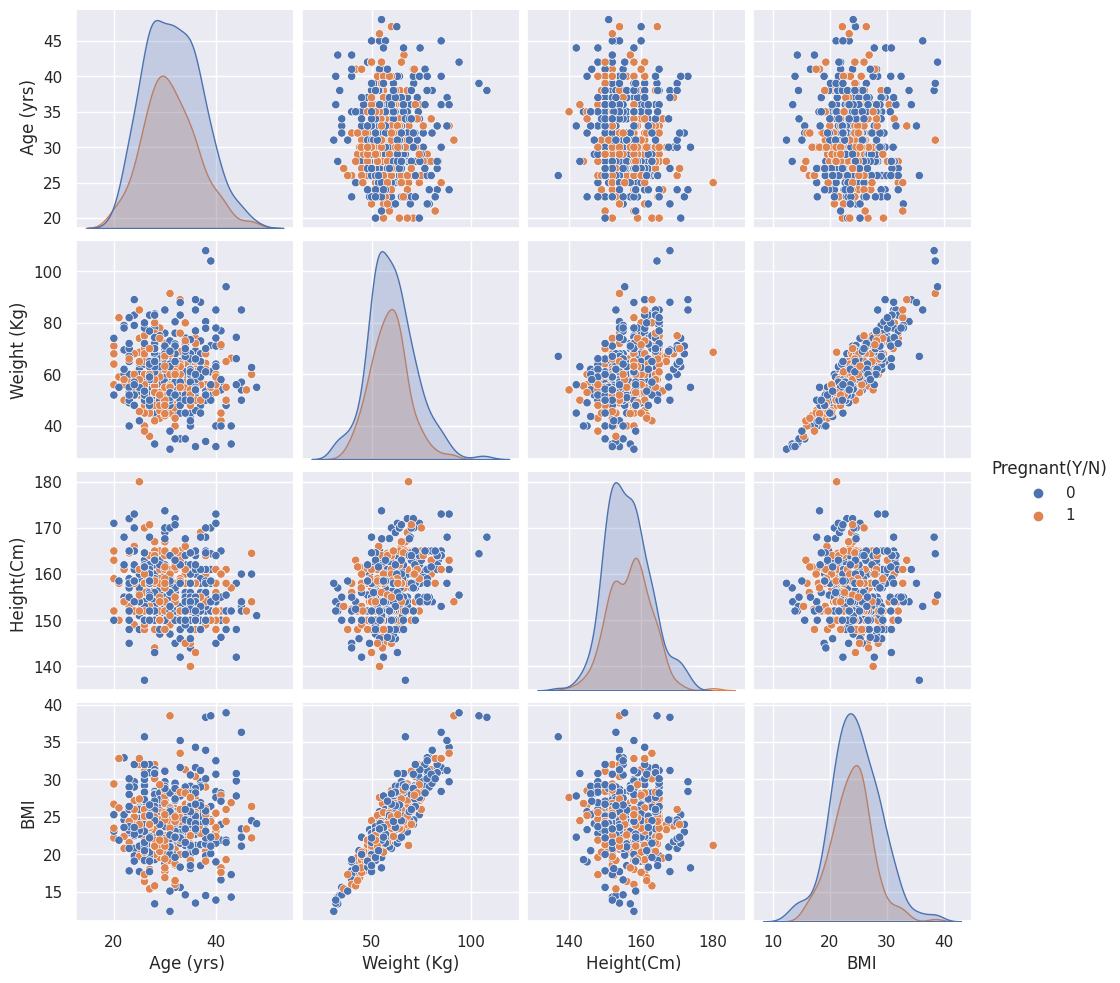

In [9]:
sns.pairplot(df, hue='Pregnant(Y/N)')
plt.show()

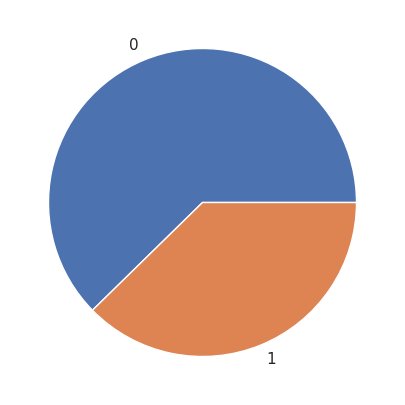

In [10]:
y =df['Pregnant(Y/N)']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [11]:
X = df.drop(columns=['Pregnant(Y/N)'])
X.head(10)

,Age (yrs),Weight (Kg),Height(Cm),BMI
0,28,44.6,152.0,19.3
1,36,65.0,161.5,24.9
2,33,68.8,165.0,25.3
3,37,65.0,148.0,29.7
4,25,52.0,161.0,20.1
5,36,74.1,165.0,27.2
6,34,64.0,156.0,26.3
7,33,58.5,159.0,23.1
8,32,40.0,158.0,16.0
9,36,52.0,150.0,23.1


In [12]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age (yrs),523.0,31.466539,5.456931,20.0,27.0,31.0,35.0,48.0
Weight (Kg),523.0,59.642830,11.057646,31.0,52.0,59.0,65.0,108.0
Height(Cm),523.0,156.505346,6.038127,137.0,152.0,156.0,160.0,180.0
BMI,523.0,24.304589,4.082846,12.4,21.6,24.2,26.7,38.9


In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Age (yrs),Weight (Kg),Height(Cm),BMI
0,-0.635863,-1.361703,-0.746864,-1.226933
1,0.831567,0.484940,0.827978,0.145972
2,0.281281,0.828923,1.408183,0.244037
3,1.014995,0.484940,-1.409955,1.322748
4,-1.186149,-0.691842,0.745092,-1.030804
5,0.831567,1.308688,1.408183,0.709844
6,0.464709,0.394419,-0.083773,0.489198
7,0.281281,-0.103451,0.413546,-0.295319
8,0.097852,-1.778103,0.247773,-2.035967
9,0.831567,-0.691842,-1.078410,-0.295319


In [14]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age (yrs),523.0,1.086872e-16,1.000957,-2.103292,-0.819291,-0.085577,0.648138,3.032710
Weight (Kg),523.0,8.287401e-16,1.000957,-2.592799,-0.691842,-0.058190,0.484940,4.377375
Height(Cm),523.0,-2.158460e-15,1.000957,-3.233456,-0.746864,-0.083773,0.579319,3.894775
BMI,523.0,5.298502e-16,1.000957,-2.918549,-0.663062,-0.025641,0.587263,3.578235


In [18]:
observations = list(df.index)
variables = list(df.columns)

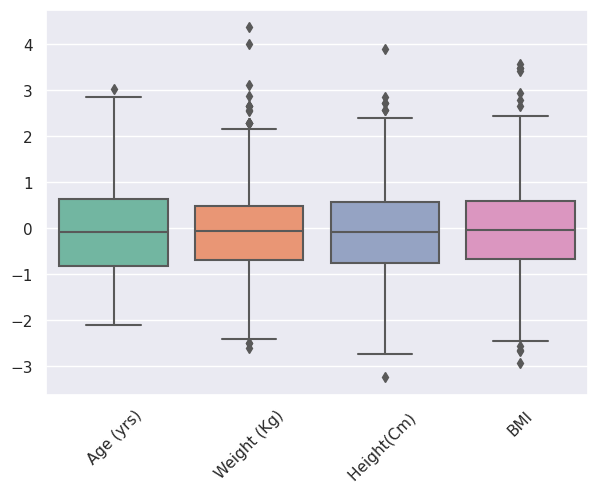

In [19]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


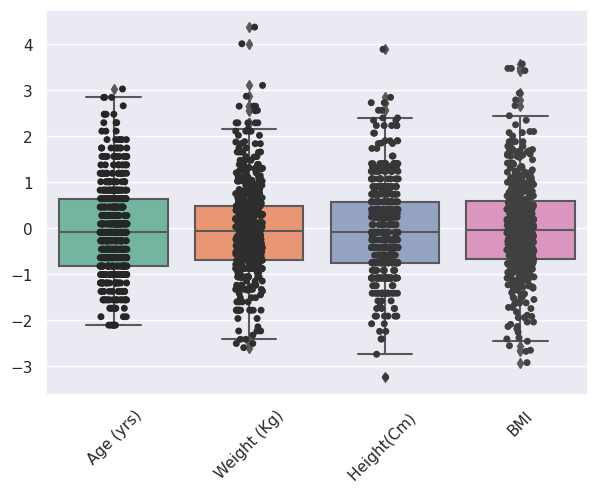

In [20]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

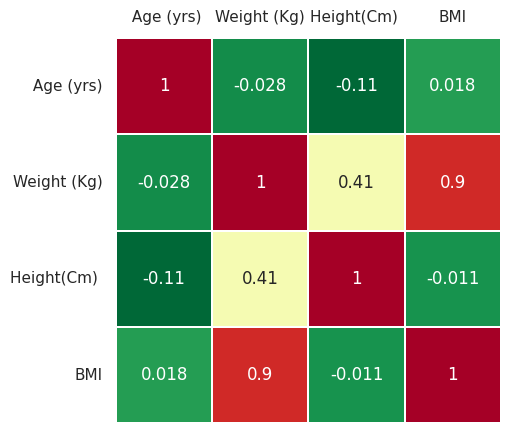

In [22]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.1, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

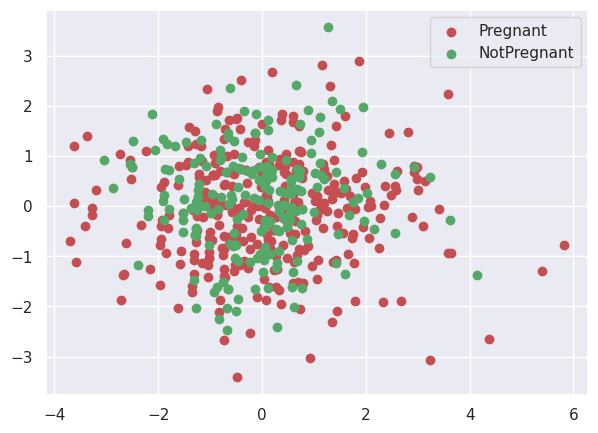

In [23]:
pca = PCA()
Z = pca.fit_transform(X)


idx_Pregnant = np.where(y == 0)
idx_NotPregnant = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Pregnant,0], Z[idx_Pregnant,1], c='r', label='Pregnant')
plt.scatter(Z[idx_NotPregnant,0], Z[idx_NotPregnant,1], c='g', label='NotPregnant')

plt.legend()

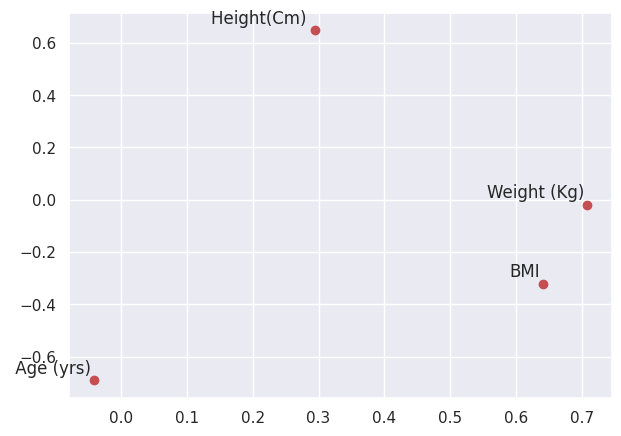

In [24]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


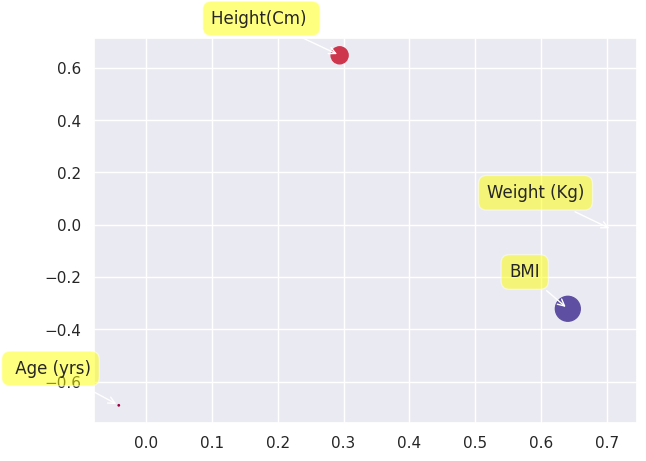

In [25]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

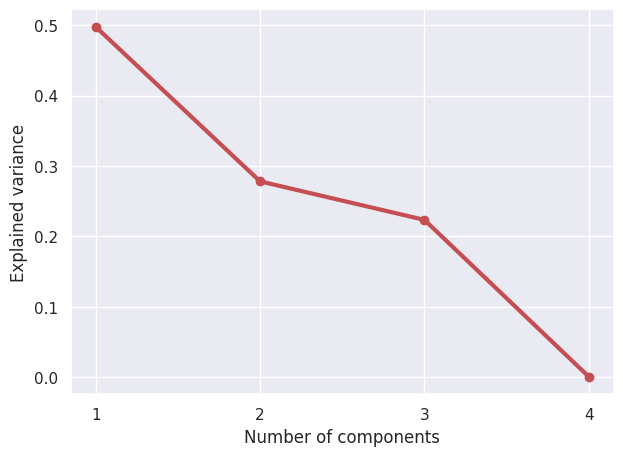

In [26]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

Text(0, 0.5, 'Cumulative explained variance')

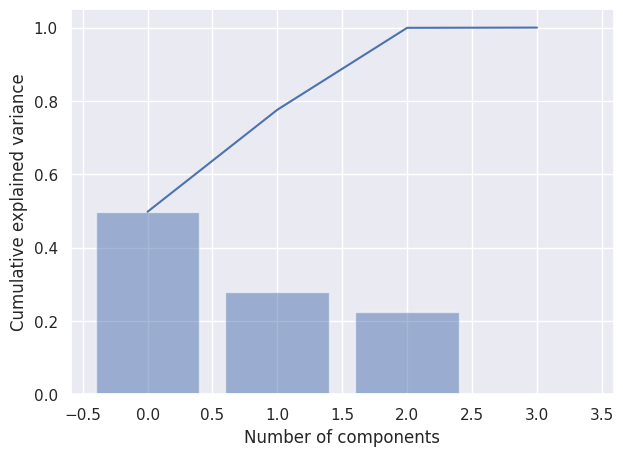

In [27]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

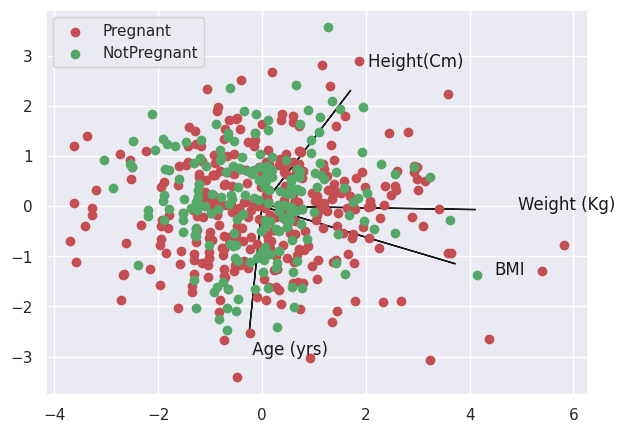

In [28]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('')
plt.ylabel('')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Pregnant,0], Z[idx_Pregnant,1], c='r', label='Pregnant')
plt.scatter(Z[idx_NotPregnant,0], Z[idx_NotPregnant,1], c='g', label='NotPregnant')

plt.legend(loc='upper left')

In [29]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [31]:
out['PC']

,PC1,PC2,PC3
0,-1.943426,0.375022,0.633607
1,0.645753,-0.093889,-1.098958
2,1.145571,0.623985,-1.052166
3,0.734215,-2.048278,0.511138
4,-0.881979,1.645844,0.119601
...,...,...,...
518,-1.162630,0.894307,-1.685617
519,0.468367,0.261816,0.095223
520,-0.757874,-0.977190,-0.173526
521,-1.231638,0.049345,1.158155


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (49.7% expl.var)', ylabel='PC2 (27.8% expl.var)'>)

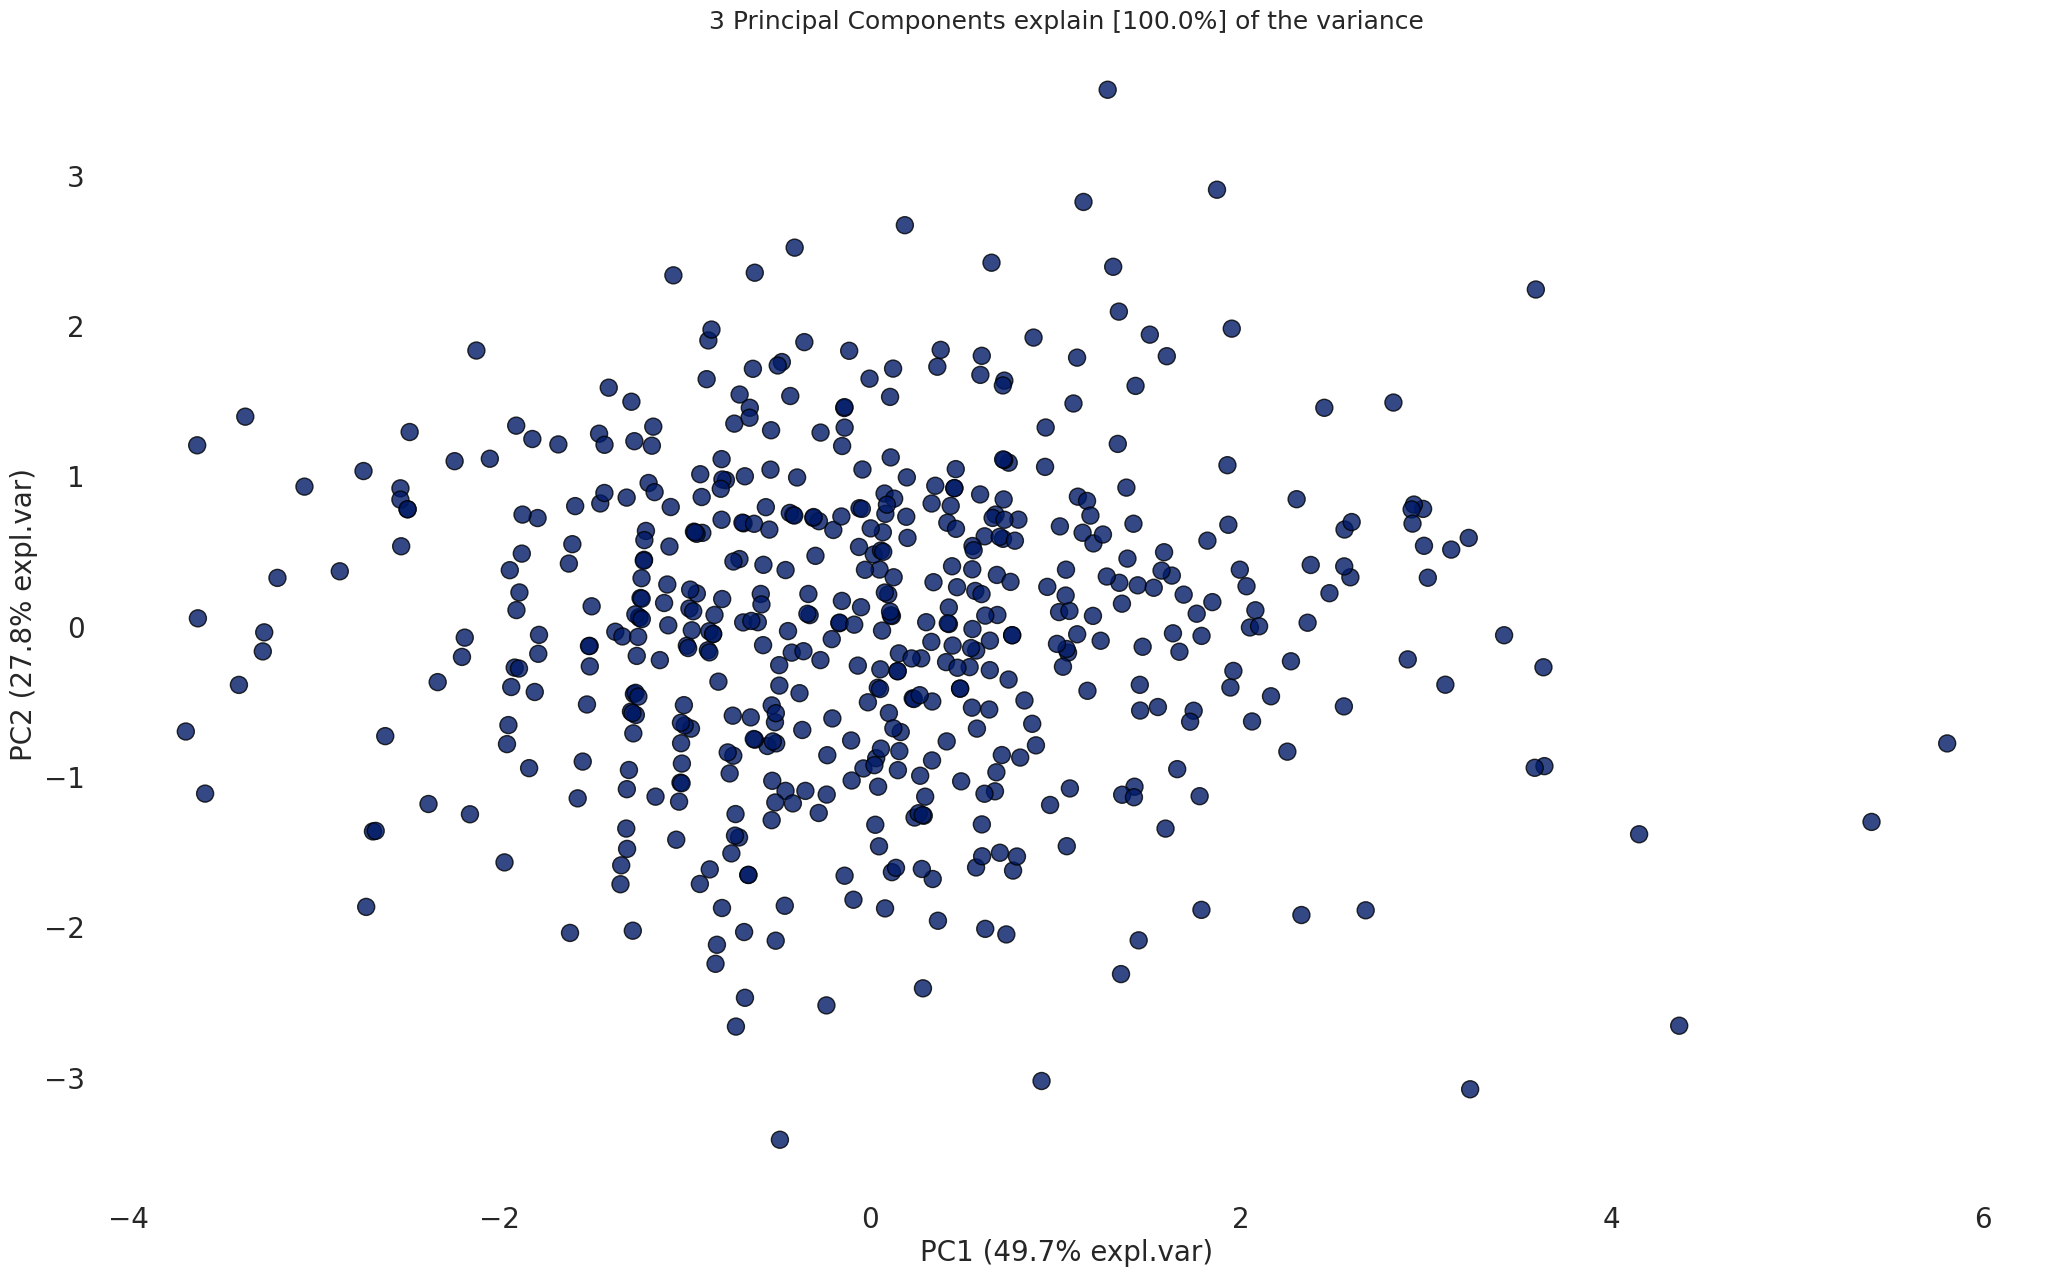

In [32]:
model.scatter(label=True, legend=False)

In [33]:
A = out['loadings'].T

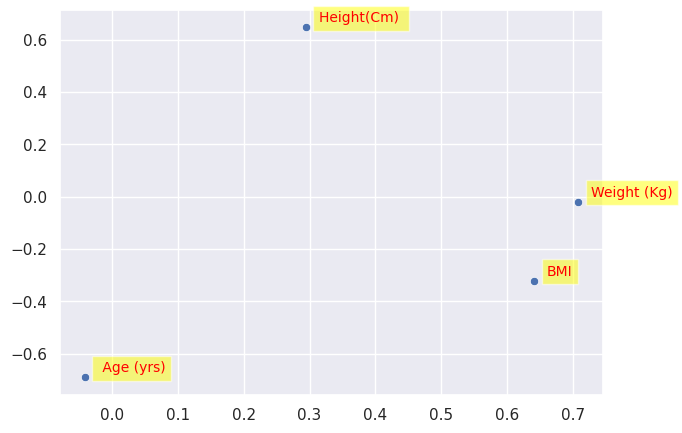

In [34]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('')
plt.ylabel('')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

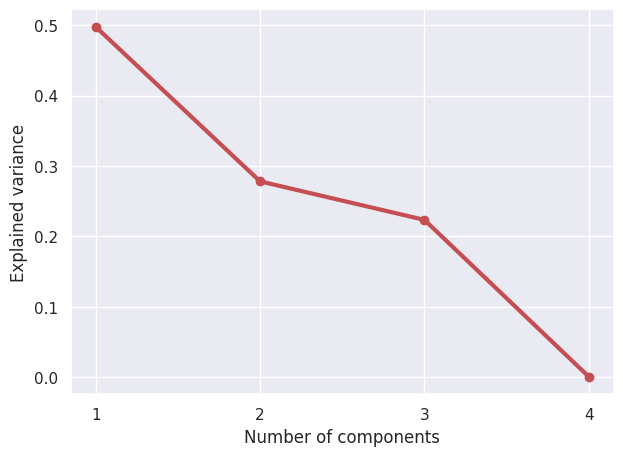

In [35]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

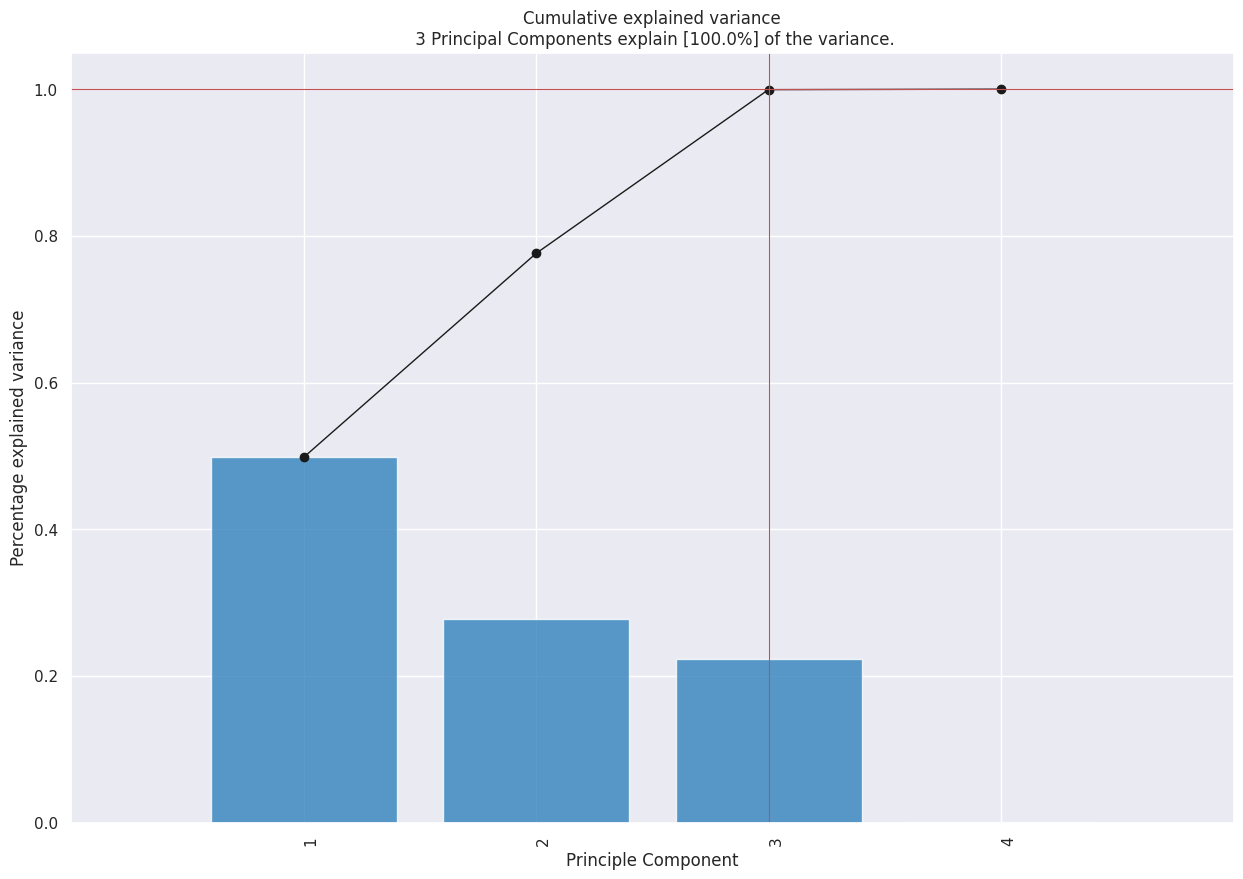

<Figure size 700x500 with 0 Axes>

In [36]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


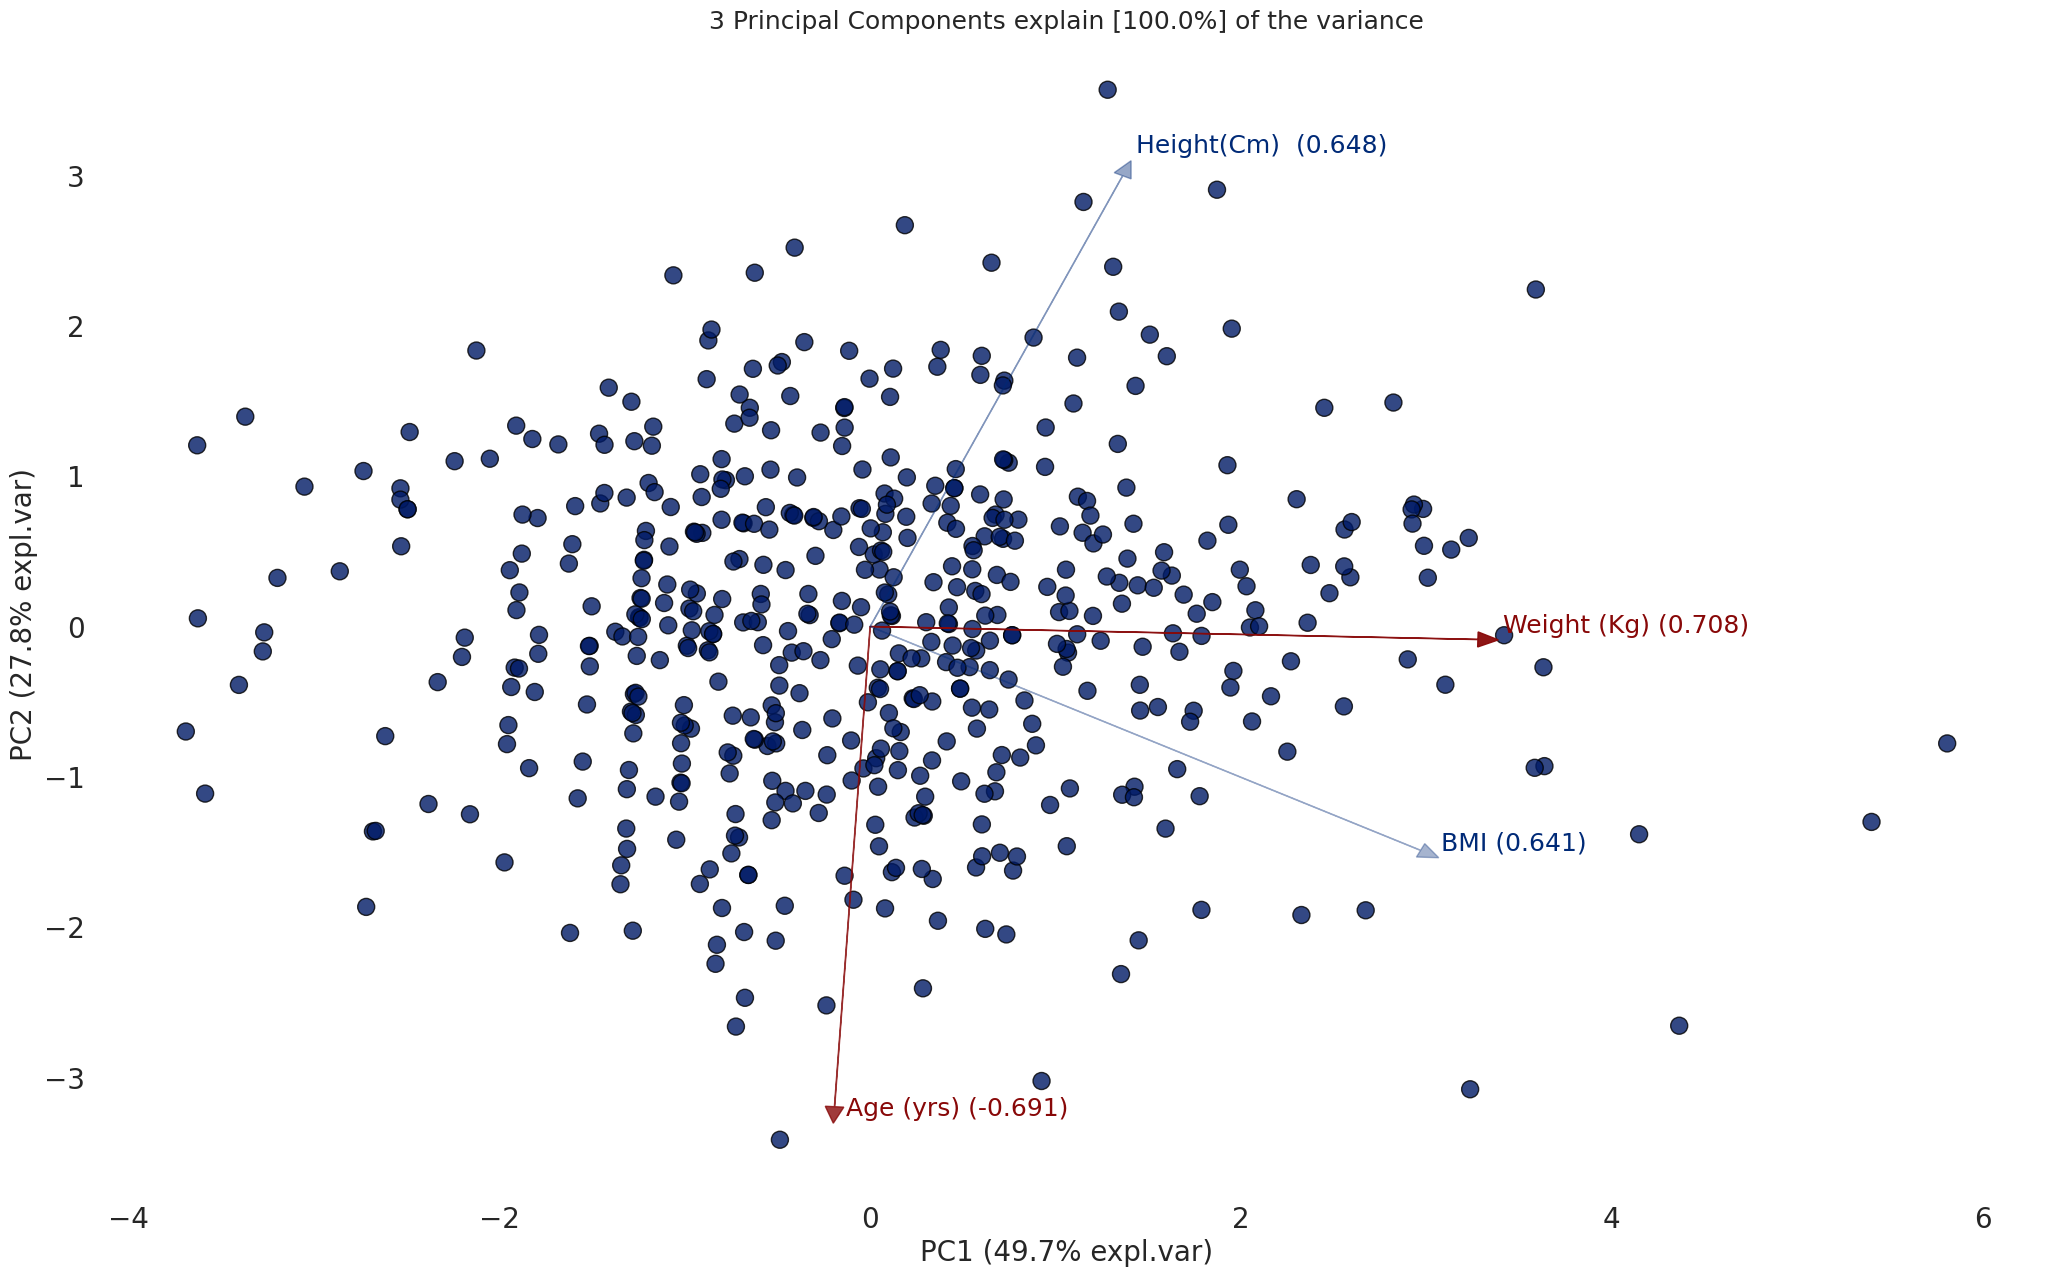

(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (49.7% expl.var)', ylabel='PC2 (27.8% expl.var)'>)

In [37]:
model.biplot(label=False, legend=False)


In [38]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from pycaret.utils import version
version()

'3.0.0'

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

#read cvs file into dataframe
df = pd.read_csv('/content/Pregnant.csv')
df.head(25)

,Age (yrs),Weight (Kg),Height(Cm),BMI,Pregnant(Y/N)
0,28,44.6,152.0,19.3,0
1,36,65.0,161.5,24.9,1
2,33,68.8,165.0,25.3,1
3,37,65.0,148.0,29.7,0
4,25,52.0,161.0,20.1,1
5,36,74.1,165.0,27.2,1
6,34,64.0,156.0,26.3,0
7,33,58.5,159.0,23.1,1
8,32,40.0,158.0,16.0,0
9,36,52.0,150.0,23.1,0


In [41]:
from pycaret.classification import *
clf_pca = setup(data=df, target='Pregnant(Y/N)', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,Pregnant(Y/N)
2,Target type,Binary
3,Original data shape,"(541, 5)"
4,Transformed data shape,"(541, 4)"
5,Transformed train set shape,"(378, 4)"
6,Transformed test set shape,"(163, 4)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [42]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6219,0.5710,0.3900,0.4961,0.4282,0.1590,0.1620,0.2470
rf,Random Forest Classifier,0.6193,0.5809,0.3405,0.5173,0.4065,0.1422,0.1518,0.3870
dummy,Dummy Classifier,0.6191,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0990
et,Extra Trees Classifier,0.6142,0.5978,0.3352,0.4962,0.3979,0.1307,0.1366,0.3760
lr,Logistic Regression,0.6138,0.5283,0.0071,0.0500,0.0125,-0.0068,-0.0201,0.9760
ridge,Ridge Classifier,0.6138,0.0000,0.0071,0.0500,0.0125,-0.0068,-0.0201,0.1390
lda,Linear Discriminant Analysis,0.6138,0.5286,0.0071,0.0500,0.0125,-0.0068,-0.0201,0.1940
ada,Ada Boost Classifier,0.6085,0.5705,0.3400,0.4783,0.3912,0.1185,0.1235,0.2080
nb,Naive Bayes,0.6059,0.5493,0.0143,0.1500,0.0258,-0.0181,-0.0267,0.4170
qda,Quadratic Discriminant Analysis,0.6033,0.5395,0.0138,0.1000,0.0243,-0.0244,-0.0439,0.1030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [43]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.5551,0.2143,0.5000,0.3000,0.1014,0.1181
1,0.5789,0.5193,0.2857,0.4000,0.3333,0.0380,0.0391
2,0.7105,0.7262,0.3571,0.7143,0.4762,0.3056,0.3407
3,0.7105,0.5149,0.2857,0.8000,0.4211,0.2818,0.3483
4,0.6053,0.5899,0.2667,0.5000,0.3478,0.1009,0.1112
5,0.5789,0.3899,0.0667,0.3333,0.1111,-0.0236,-0.0368
6,0.6316,0.4580,0.3333,0.5556,0.4167,0.1713,0.1833
7,0.7368,0.6638,0.5333,0.7273,0.6154,0.4225,0.4342
8,0.7297,0.6848,0.5000,0.7000,0.5833,0.3914,0.4036


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

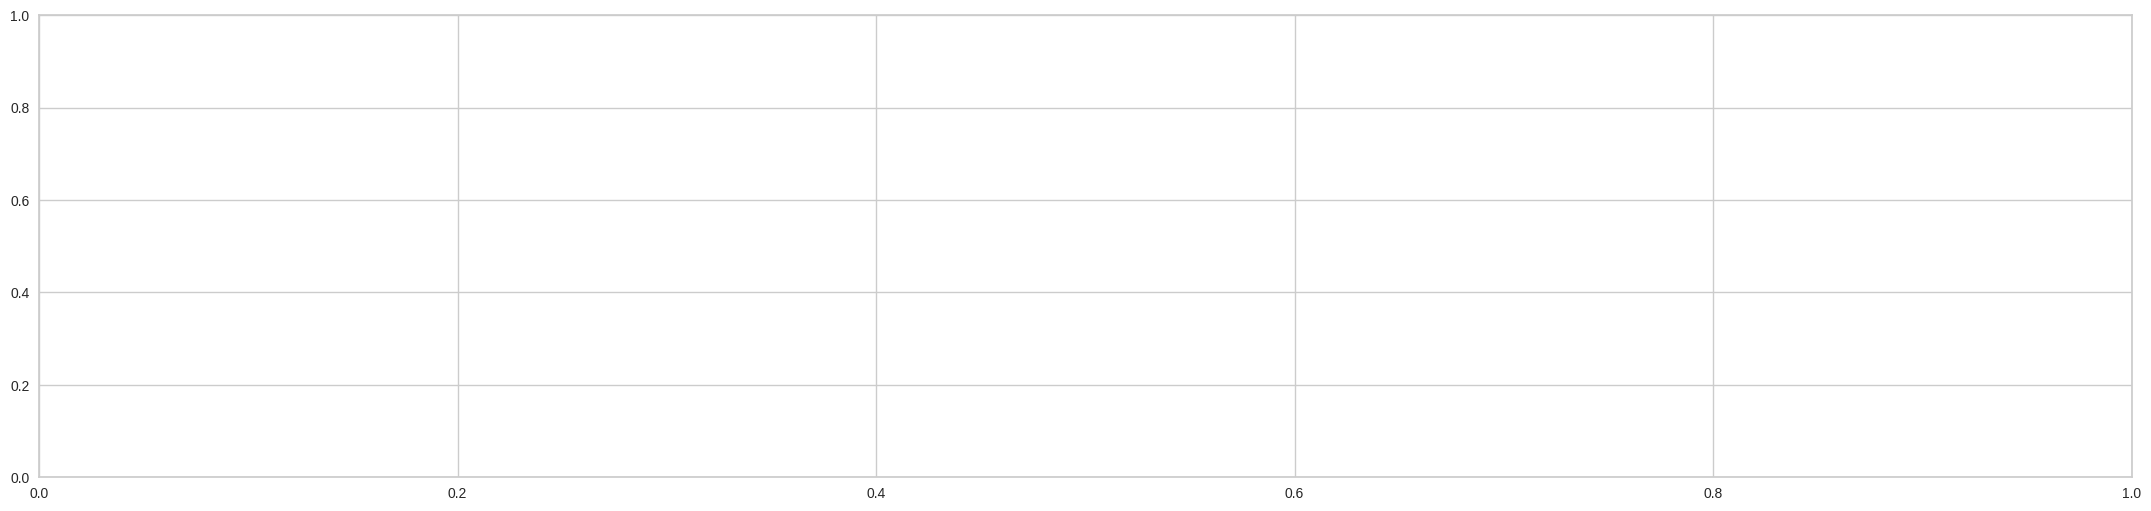

In [46]:
evaluate_model(tuned_best_model_pca)

In [47]:
!pip install pycaret[analysis]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5263,0.5253,0.3571,0.3571,0.3571,-0.0179,-0.0179
1,0.6316,0.5923,0.2857,0.5000,0.3636,0.1307,0.1409
2,0.7368,0.7604,0.4286,0.7500,0.5455,0.3791,0.4085
3,0.6316,0.6280,0.2857,0.5000,0.3636,0.1307,0.1409
4,0.6842,0.6449,0.4000,0.6667,0.5000,0.2897,0.3099
5,0.5526,0.4159,0.2000,0.3750,0.2609,-0.0189,-0.0209
6,0.6053,0.5014,0.4000,0.5000,0.4444,0.1441,0.1463
7,0.5000,0.5449,0.3333,0.3571,0.3448,-0.0587,-0.0587
8,0.6216,0.6040,0.2857,0.5000,0.3636,0.1220,0.1317


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6316,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6316,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6316,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6053,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6053,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6053,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6053,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6216,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


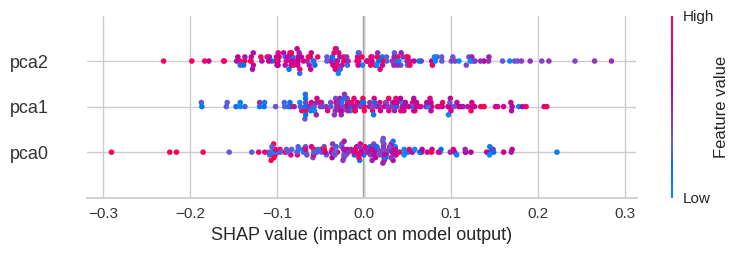

In [50]:
interpret_model(tuned_rf_pca, plot='summary')

In [51]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [52]:
interpret_model(tuned_rf_pca, plot='reason')